<img src= "https://images.pexels.com/photos/3943723/pexels-photo-3943723.jpeg"  height= 400>

__1)__ Faça a análise exploratória dos dados referente ao dataset [Finance Data](https://www.kaggle.com/nitindatta/finance-data?select=Original_data.csv). Consulte o Kaggle para mais informações a respeito dos tipos de dados que estão disponíveis e faça o processo de análise seguindo os passos da aula.

Segundo a [documentação](https://www.kaggle.com/datasets/nitindatta/finance-data?select=Original_data.csv), o dataset foi coletado através do Google Forms e é as colunas foram elaboradas da seguinte forma:


* 'GENDER',
* 'AGE',
* 'Do you invest in Investment Avenues?',
* 'What do you think are the best options for investing your money? (Rank in order of preference) [Mutual Funds]',
* 'What do you think are the best options for investing your money? (Rank in order of preference) [Equity Market]',
* 'What do you think are the best options for investing your money? (Rank in order of preference) [Debentures]',
* 'What do you think are the best options for investing your money? (Rank in order of preference) [Government Bonds]',
* 'What do you think are the best options for investing your money? (Rank in order of preference) [Fixed Deposits]',
* 'What do you think are the best options for investing your money? (Rank in order of preference) [Public Provident Fund]',
* 'What do you think are the best options for investing your money? (Rank in order of preference) [Gold]',
* 'Do you invest in the Stock Market?',
* 'What are the factors considered by you while investing in any instrument?',
* 'What is your investment objective?',
* 'What is your purpose behind the investment?',
* 'How long do you prefer to keep your money in any investment instrument?',
* 'How often do you monitor your investment?',
* 'How much return do you expect from any investment instrument?',
* 'Which investment avenue do you mostly invest in?',
* 'What are your savings objectives?',
* 'Reasons for investing in Equity Market',
* 'Reasons for investing in Mutual Funds',
* 'Reasons for investing in Government Bonds',
* 'Reasons for investing in Fixed Deposits ',
* 'Your sources of information for investments is '

In [1]:
#Importando as bibliotecas necessárias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

O arquivo .csv foi colocado no Google Drive, então o primeiro passo será conectar ao Drive e em seguida abrir o arquivo do local em que se encontra.


In [2]:
# Montando o Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importando o dataset, verificando o número de linhas e colunas e exibindo uma prévia
finance = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Finance_data.csv')
print(f'O dataset possui {finance.shape[0]} linhas e {finance.shape[1]} colunas:')
finance.head() 

O dataset possui 40 linhas e 24 colunas:


,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


Vamos investigar também mais algumas informações do dataset, como o nome das colunas, os tipos de dados e se existe algum dado faltante:

In [4]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   gender                             40 non-null     object
 1   age                                40 non-null     int64 
 2   Investment_Avenues                 40 non-null     object
 3   Mutual_Funds                       40 non-null     int64 
 4   Equity_Market                      40 non-null     int64 
 5   Debentures                         40 non-null     int64 
 6   Government_Bonds                   40 non-null     int64 
 7   Fixed_Deposits                     40 non-null     int64 
 8   PPF                                40 non-null     int64 
 9   Gold                               40 non-null     int64 
 10  Stock_Marktet                      40 non-null     object
 11  Factor                             40 non-null     object
 12  Objective 

Verificamos que não existem dados faltantes e que exceto idade e o "ranking numérico" dos " Investment Avenues ", todos os outros dados são categóricos.

### Análise Exploratória de Dados

Qual é a relação de **gênero** entre os investidores consultados?

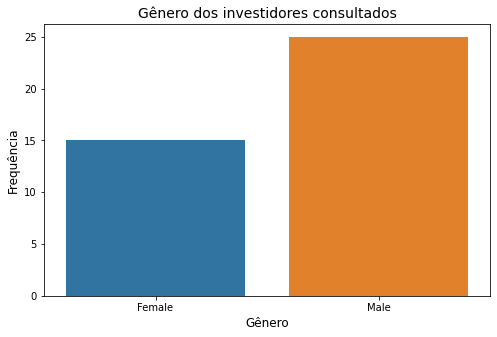

In [17]:
# Visualizando com gráfico de barras: Countplot

# dimensionando a figura
plt.figure(figsize = (8, 5))

# Criando um grafico de barras
sns.countplot(data = finance,
              x = 'gender')

# Colocando um titulo
plt.title('Gênero dos investidores consultados', fontsize = 14)

# Nome dos eixos
plt.xlabel('Gênero', fontsize = 12)
plt.ylabel('Frequência', fontsize = 12)

# Aumentar os numeros da grade
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

# mostrando o gráfico
plt.show()

Relação entre gênero e idade:

<Figure size 576x360 with 0 Axes>

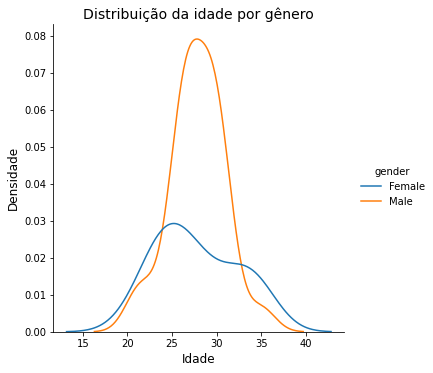

In [6]:
#  Visualizando com KDE

# dimensionando a figura
plt.figure(figsize = (8, 5))

# Criando um grafico de barras
sns.displot(data = finance,
            x = 'age',
            hue = 'gender', 
            kind='kde')

# Colocando um titulo
plt.title('Distribuição da idade por gênero', fontsize = 14)

# Nome dos eixos
plt.xlabel('Idade', fontsize = 12)
plt.ylabel('Densidade', fontsize = 12)

# Aumentar os numeros da grade
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

# mostrando o gráfico
plt.show()

Verifica-se uma maior densidade da distribuição da idade dos particioantes entre 25 e 30 anos (Calculada pelo método KDE - Kernel Density Estimation).


Em seguida vamos comparar alguns dados fazendo o recorte entre gêneros. Como muitas das categorias são respostas para as perguntas aplicadas no formulário, optou-se por manter as perguntas originais no título de cada gráfico.

Text(0.5, 1.0, 'Do you invest in the Stock Market?')

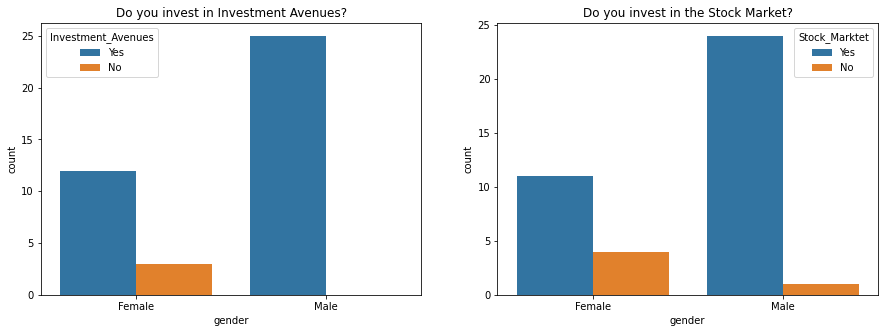

In [32]:
# Análise de tipo de investimento por gênero:

#criando uma figura com dois subplots
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.countplot(ax=axes[0], x=finance['gender'], hue=finance['Investment_Avenues'])
axes[0].set_title('Do you invest in Investment Avenues?')

sns.countplot(ax=axes[1], x=finance['gender'], hue=finance['Stock_Marktet'])
axes[1].set_title('Do you invest in the Stock Market?')

Proporcionalmente temos uma participação levemente maior das mulheres no mercado de ações. 

Text(0.5, 1.0, 'What are the factors considered by you while investing in any instrument?')

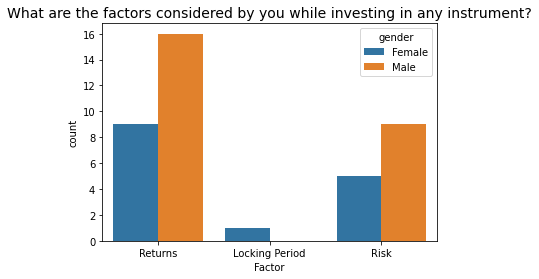

In [31]:
# Factor                             
                      
sns.countplot(x="Factor",hue="gender",data=finance)
plt.title('What are the factors considered by you while investing in any instrument?', fontsize = 14)

Em relação aos fatores considerados, Risco e Retorno mantém certa proporção, sendo o Período de Retenção considerado apenas por uma participante do gênero feminino.

Text(0.5, 1.0, 'What are your savings objectives?')

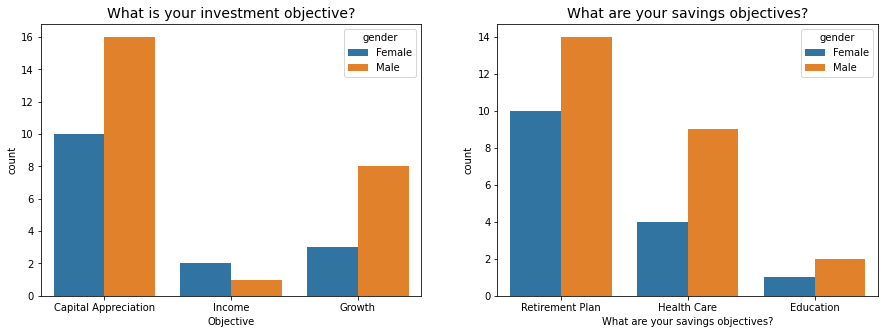

In [38]:
#OBJETIVOs

#criando uma figura com dois subplots
fig, axes = plt.subplots(1, 2, figsize=(15,5))

#objetivo de investimento

sns.countplot(ax=axes[0], x=finance["Objective"], hue=finance["gender"])
axes[0].set_title('What is your investment objective?', fontsize = 14)


# Objetivo de economizar
sns.countplot(ax=axes[1], x="What are your savings objectives?",hue="gender",data=finance)
axes[1].set_title('What are your savings objectives?', fontsize = 14)


Entre os objetivos de investimento a "Geração de Renda" foi mais relatada entre participantes do gênero feminino, enquanto a maior diferença proporcional entre o objetivo das economias foi para "Cuidados de Saúde", com preponderância do gênero masculino.

Text(0.5, 1.0, 'What is your purpose behind the investment?')

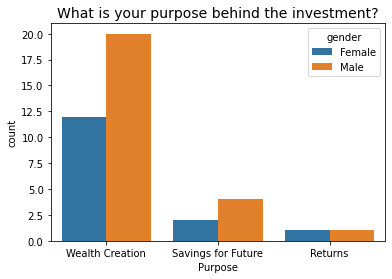

In [41]:
#Propósito por trás dos investimentos
sns.countplot(x="Purpose",hue="gender",data=finance)
plt.title('What is your purpose behind the investment?', fontsize = 14)

Text(0.5, 1.0, 'How often do you monitor your investment?')

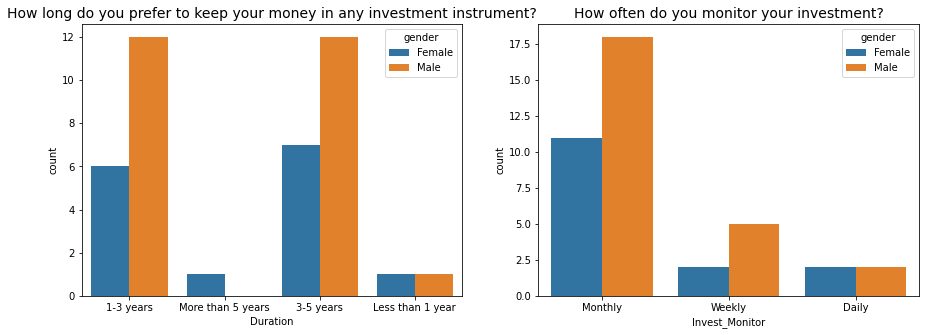

In [39]:
# Dimensões temporais

#criando uma figura com dois subplots
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Duração pretendida

sns.countplot(ax=axes[0], x="Duration",hue="gender",data=finance)
axes[0].set_title('How long do you prefer to keep your money in any investment instrument?', fontsize = 14)

# Invest_Monitor

sns.countplot(ax=axes[1], x="Invest_Monitor",hue="gender",data=finance)
axes[1].set_title('How often do you monitor your investment?', fontsize = 14)

Para ambos os gêneros o perído pretendido para manter os investimentos foi 1-3 anos e  3-5 anos e apenas uma participante declarou pretender manter por mais de 5 anos.

A maior frequência de monitomento dos investimentos foi mensal para ambos os gêneros. 

Text(0.5, 1.0, 'How much return do you expect from any investment instrument?')

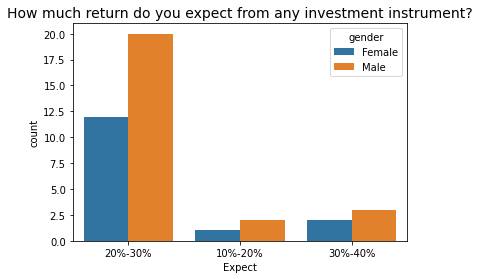

In [42]:
# Retorno Esperado

sns.countplot(x="Expect",hue="gender",data=finance)
plt.title('How much return do you expect from any investment instrument?', fontsize = 14)



(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

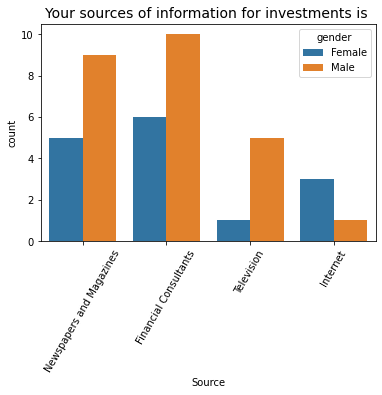

In [46]:
#Fonte de Informações

sns.countplot(x="Source",hue="gender",data=finance)
plt.title('Your sources of information for investments is ', fontsize = 14)
plt.xticks(rotation=60)


Como fonte de informações "Televisão" foi muito mais citada entre o gênero Masculino e "internet" entre o gênero Feminino